In [ ]:
# Slowness calculations using iasp91.  Please ignore


In [2]:
import obspy.taup as taup
import numpy as np

model=taup.TauPyModel(model="iasp91")
dx=0.1
x=np.linspace(0,90, num=int(90/dx)+1)
t=np.zeros_like(x)
slowness_tp=np.zeros_like(x)
depth=0
for i, dist in enumerate(x):
    arrival=model.get_ray_paths(source_depth_in_km=depth, phase_list=["P"], distance_in_degree=dist)
    slow=arrival[0].ray_param_sec_degree   
    t[i]=arrival[0].time
    slowness_tp[i]=slow

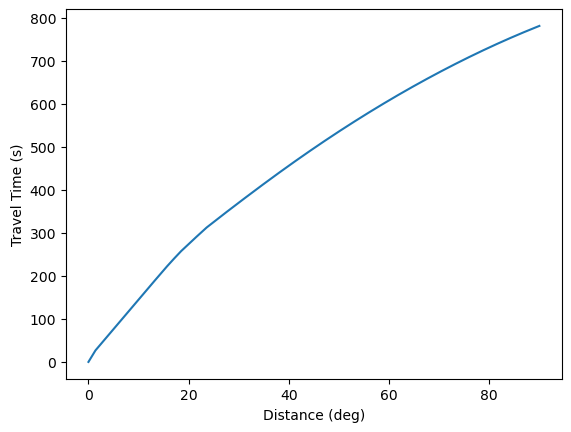

In [3]:
import matplotlib.pyplot as plt
plt.plot(x,t)
plt.xlabel("Distance (deg)")
plt.ylabel("Travel Time (s)")
plt.show()

In [4]:
slowness=np.diff(t)/np.diff(x)
slowness=np.insert(slowness, -1, slowness[-1])  # make the lengths equal



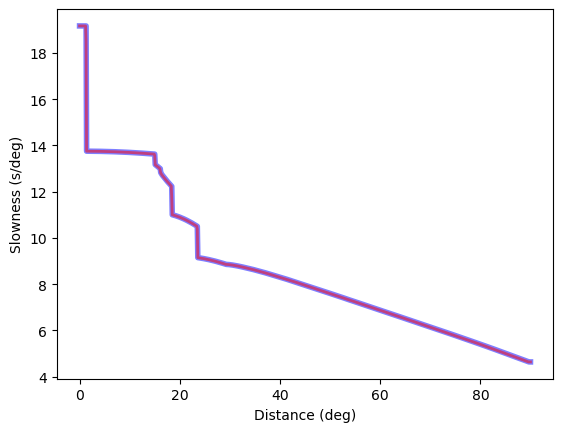

In [5]:
plt.plot(x, slowness_tp, 'b-', alpha=0.5, label="TauP-slowness", linewidth=4)
plt.plot(x, slowness, 'r-', alpha=0.5, label="Calculated Slowness", linewidth=2)
plt.xlabel("Distance (deg)")
plt.ylabel("Slowness (s/deg)")
plt.show()  

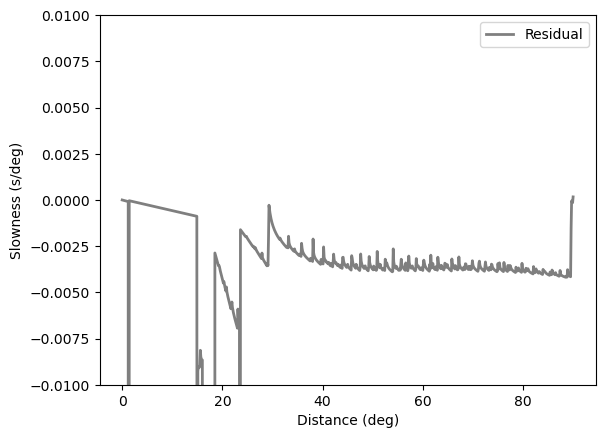

In [6]:

residual = slowness - slowness_tp
plt.plot(x, residual, 'k-', alpha=0.5, label="Residual", linewidth=2)  
plt.xlabel("Distance (deg)")
plt.ylabel("Slowness (s/deg)")
plt.legend()
plt.ylim(-0.01, 0.01)
plt.show()